In [1]:
import json
from google_play_scraper import Sort, reviews_all
from datetime import datetime

In [2]:
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

In [3]:
result = reviews_all(
    'com.rework.app',
    sleep_milliseconds=0,
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
)

In [4]:
# Specify the file path where you want to save the results
file_path = 'gowork_review.json'

# Write the results to the JSON file using the custom encoder
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(result, file, ensure_ascii=False, indent=2, cls=DateTimeEncoder)

In [5]:
import pandas as pd

data = pd.read_json(file_path)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d01cb850-1338-43aa-8ef2-7f3bcc97c781,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tampilan aplikasinya sederhana jadi mudah dime...,5,16,None,2020-01-16T14:12:31,NaN,NaN,None
1,081432a2-377e-488c-8efe-d2a1ea3972d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus bagus tempatnya, pernah nyoba beberapa t...",5,8,None,2020-01-21T11:53:55,NaN,NaN,None
2,4d4bcfcc-dcec-4513-80f2-1c3cc9afaab4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi coworking terbaik menurut saya, tampi...",5,10,None,2020-01-23T01:00:48,NaN,NaN,None
3,3bf05cb7-0ced-4c58-96eb-038f435cb85d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus, nyaman, banyak spot buat foto, pelayana...",5,4,None,2020-01-21T12:48:29,NaN,NaN,None
4,13bcb39e-8389-4a79-a729-844a1b5b8273,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi terbaik buat cari coworking, tempatny...",5,1,None,2020-01-21T15:33:55,NaN,NaN,None


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              67 non-null     object 
 1   userName              67 non-null     object 
 2   userImage             67 non-null     object 
 3   content               67 non-null     object 
 4   score                 67 non-null     int64  
 5   thumbsUpCount         67 non-null     int64  
 6   reviewCreatedVersion  24 non-null     object 
 7   at                    67 non-null     object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            24 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.9+ KB


In [7]:
data.drop(columns=[
    'reviewId',
    'userImage',
    'userName',
    'replyContent',
    'repliedAt',
    'appVersion'
], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               67 non-null     object
 1   score                 67 non-null     int64 
 2   thumbsUpCount         67 non-null     int64 
 3   reviewCreatedVersion  24 non-null     object
 4   at                    67 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.7+ KB


In [9]:
data.reset_index(inplace=True)
data.head()

,index,content,score,thumbsUpCount,reviewCreatedVersion,at
0,0,Tampilan aplikasinya sederhana jadi mudah dime...,5,16,None,2020-01-16T14:12:31
1,1,"Bagus bagus tempatnya, pernah nyoba beberapa t...",5,8,None,2020-01-21T11:53:55
2,2,"Aplikasi coworking terbaik menurut saya, tampi...",5,10,None,2020-01-23T01:00:48
3,3,"Bagus, nyaman, banyak spot buat foto, pelayana...",5,4,None,2020-01-21T12:48:29
4,4,"Aplikasi terbaik buat cari coworking, tempatny...",5,1,None,2020-01-21T15:33:55


In [10]:
rating_df = data.groupby(by='score').agg({
    'index': 'nunique'
}).reset_index()

rating_df.head()

,score,index
0,1,1
1,2,1
2,4,3
3,5,62


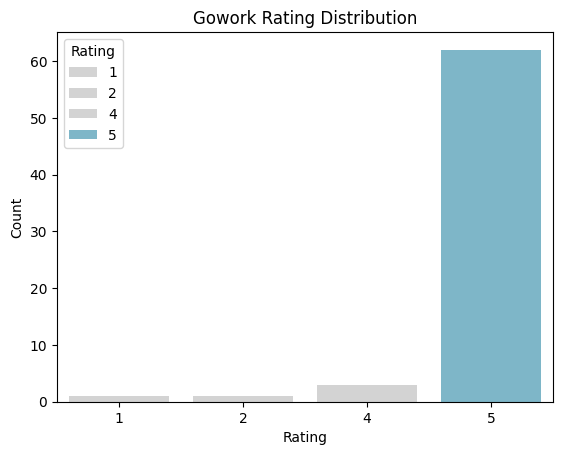

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'score' column in your DataFrame represents the ratings
labels = rating_df['score']
sizes = rating_df['index']

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
# Create a bar plot using seaborn
sns.barplot(x=labels, y=sizes, palette=colors, hue=labels)

# Adding a title
plt.title('Gowork Rating Distribution')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.legend(title='Rating', loc='upper left')

# Display the bar plot
plt.show()

In [12]:
pd.set_option('display.max_colwidth', None)
data.sort_values(by='thumbsUpCount', ascending=False)

most_thumbs_df = data[['content', 'score', 'thumbsUpCount']].sort_values(by='thumbsUpCount', ascending=False)

most_thumbs_df[most_thumbs_df.thumbsUpCount != 0].head(10)

,content,score,thumbsUpCount
0,Tampilan aplikasinya sederhana jadi mudah dimengerti oleh awam sekalipun. Pilihan service nya juga beragam. Dan yang paling bagus menurut saya orangnya ramah dan sopan.,5,16
7,"Akhirnya aku menemukan aplikasi yang selama ini ku butuhkan, bosen banget tiap hari rapat di kantor yang sumpeknya minta. Makasih udh kasih rekomendasi tempat buat rapat yang bagus dan nyaman banget ternyata. Good jobs.",5,12
14,"Baru tau kalau ada aplikasi ini, ternyata berguna banget buat kegiatan kantor. Jadi bisa rekomendasiin tempat yang bagus buat meeting ke bos.",5,11
2,"Aplikasi coworking terbaik menurut saya, tampilan menu sederhana mudah dimengerti oleh awam sekalipun. Banyak pilihan tempat dan service juga memuaskan.",5,10
38,Semenjak pake GoWork sekarang kalau mau ketemu clients nggak bingung lagi buat tentuin tempat yang cocok lagi. Bahkan sampai banyak clients yang minta besok ketemuan disitu lagi. Good jobs GoWork.,5,10
1,"Bagus bagus tempatnya, pernah nyoba beberapa tempat dan kayaknya cocok, enak buat menyendiri apalagi waktu garap naskah yang butuh banyak inspirasi.",5,8
35,Pelayanannya bagus namun aplikasinya spam penuhin email saya,4,7
36,"Yashh baru kali ini si bos bilang ""besok kita meeting disitu lagi"", akhirnya setelah beberapa kali pindah tempat jodoh juga sama GoWork. Nice pokoknya.",5,6
12,"Meskipun dah banyak aplikasi model begini, tapi menurut gw ini yang terbaik. Pelayanannya ramah banget soalnya, selain itu tempatnya juga adem bikin betah buat disitu lama.",5,6
15,"Awalnya cuma iseng coba cari tempat buat ketemu clients, eh ternyata malah clients banyak yang suka tempatnya. Thx GoWork, tempatnya enjoyable banget.",5,6


In [13]:
lowest_score_df = most_thumbs_df.sort_values(by='score', ascending=True)
lowest_score_df[lowest_score_df.score <= 3]

,content,score,thumbsUpCount
64,Ga jelas,1,0
44,Mungkin bisa ditambahkab list tempat untuk daerah malang,2,0


In [14]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
# Apply split() to each cell in the 'content' column
split_it = most_thumbs_df['content'].apply(lambda x: x.split())

# Flatten the list of lists
flat_list = [word for sublist in split_it for word in sublist]

# Remove stop words
stop_words = set(stopwords.words('indonesian'))
filtered_words = [word for word in flat_list if word.lower() not in stop_words]

# Use Counter to count occurrences of each word
word_counter = Counter(filtered_words)

# Get the most common words
most_occur = word_counter.most_common()
most_occur_df = pd.DataFrame(most_occur, columns=['Word', 'Count'])
most_occur_df.head(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbint\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Count
0,bagus,15
1,GoWork,14
2,banget,13
3,nyaman,10
4,meeting,10
5,Good,9
6,cari,9
7,kali,8
8,tempatnya,8
9,bikin,8


In [16]:
version_score_df = data.groupby(by=['reviewCreatedVersion']).agg({
    'score': 'mean',
    'index': 'nunique'
}).sort_values(by=['reviewCreatedVersion', 'score'], ascending=False).reset_index()

version_score_df

,reviewCreatedVersion,score,index
0,2.5.1,2.0,1
1,2.5.0,5.0,4
2,2.3.1,5.0,1
3,2.3.0,5.0,1
4,2.1.5,5.0,2
5,2.1.4,5.0,1
6,2.1.10,4.0,1
7,1.2.18,5.0,1
8,1.2.17,5.0,2
9,1.2.16,5.0,4


In [18]:
data[data.reviewCreatedVersion == '2.5.1']

,index,content,score,thumbsUpCount,reviewCreatedVersion,at
44,44,Mungkin bisa ditambahkab list tempat untuk daerah malang,2,0,2.5.1,2022-08-21T08:24:14
